# Linear Regression with SciKit-Learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df  = pd.read_csv('gdrive/My Drive/csv_files/ml/Advertising.csv')

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


relationship between each advertising channel (TV,Radio,Newspaper) and sales

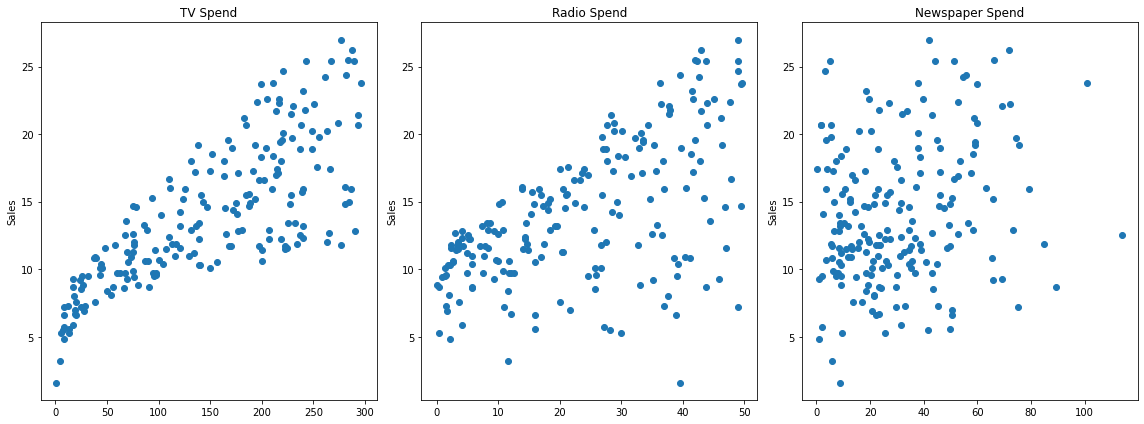

In [5]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

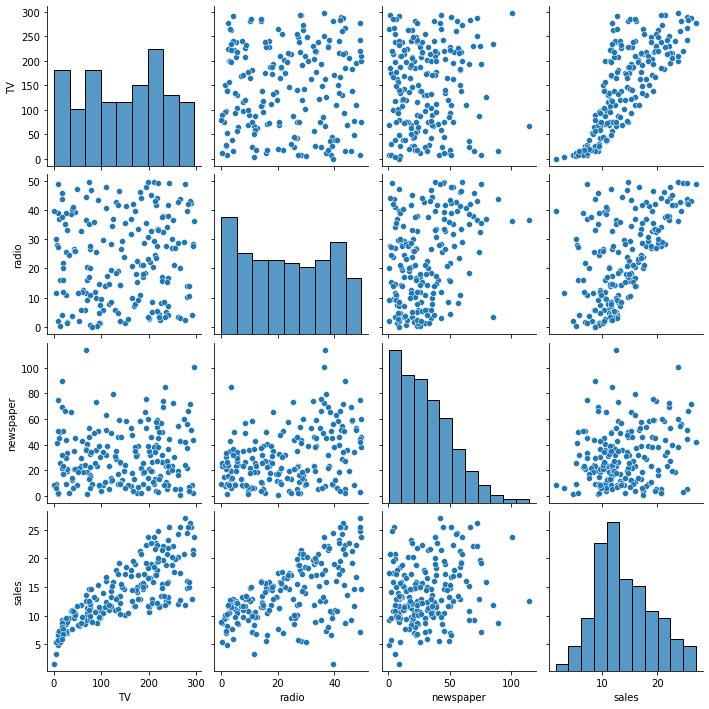

In [6]:
sns.pairplot(data=df)

In [7]:
X = df.drop('sales',axis=1)

In [8]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [9]:
y = df['sales']

In [10]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

## Creating a Model (Estimator)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
len(df)

200

In [15]:
len(X_test)

60

In [16]:
len(X_train)

140

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()

### Fit/Train the Model on the training data

In [19]:
model.fit(X_train,y_train)

LinearRegression()

### Calculate Performance on Test Set

In [20]:
test_predictions = model.predict(X_test)

In [21]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
df['sales'].mean()

14.0225

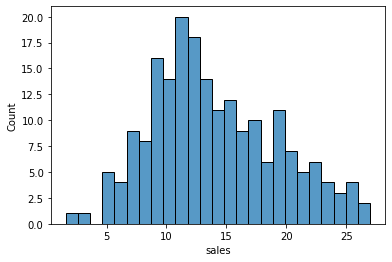

In [24]:
sns.histplot(data=df,x='sales',bins=25)

In [25]:
mean_absolute_error(y_test,test_predictions)

1.213745773614481

In [26]:
mean_squared_error(y_test,test_predictions)

2.2987166978863796

In [27]:
np.sqrt(mean_squared_error(y_test,test_predictions))

1.5161519375993884

### Plotting Residuals

In [28]:
residual = y_test - test_predictions

In [29]:
residual

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

In [38]:
y_test

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
119     6.6
54     20.2
74     17.0
145    10.3
142    20.1
148    10.9
112    14.1
174    11.5
55     23.7
141    19.2
149    10.1
25     12.0
34      9.5
170     8.4
39     21.5
172     7.6
153    19.0
175    27.0
61     24.2
65      9.3
50     11.4
42     20.7
129     9.7
179    12.6
2       9.3
12      9.2
133    19.6
90     11.2
22      5.6
41     17.1
32      9.6
125    10.6
196     9.7
158     7.3
180    10.5
16     12.5
186    10.3
144    11.4
121     7.0
80     11.8
18     11.3
78      5.3
48     14.8
4      12.9
15     22.4
1      10.4
43     12.9
102    14.8
164    11.9
9      10.6
155     3.2
36     25.4
190    10.8
33     17.4
45     14.9
Name: sales, dtype: float64

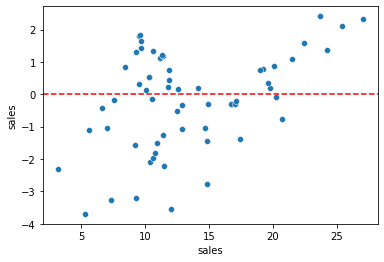

In [30]:
sns.scatterplot(x=y_test, y=residual)
plt.axhline(y=0,color='r',ls='--')

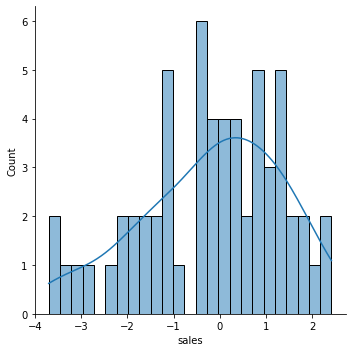

In [31]:
sns.displot(residual,bins=25,kde=True)

### Normal Probability Plot

In [32]:
import scipy as sp

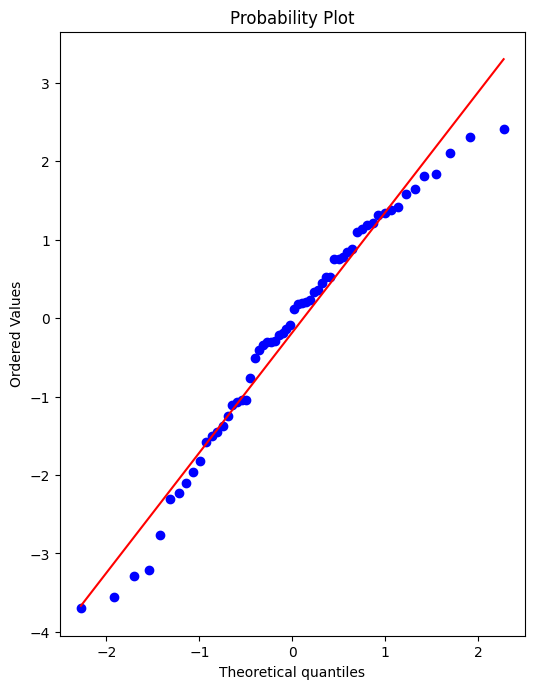

In [33]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_= sp.stats.probplot(residual,plot=ax)

## Retraining Model on Full Data

In [34]:
final_model = LinearRegression()

In [35]:
final_model.fit(X,y)

LinearRegression()

Note how it may not really make sense to recalulate RMSE metrics here, since the model has already seen all the data, its not a fair judgement of performance to calculate RMSE on data its already seen, thus the purpose of the previous examination of test performance.

In [36]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [37]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


## Deployment, Predictions, and Model Attributes

### Final Model Fit

Note, we can only do this since we only have 3 features, for any more it becomes unreasonable.

In [39]:
y_hat = final_model.predict(X) 

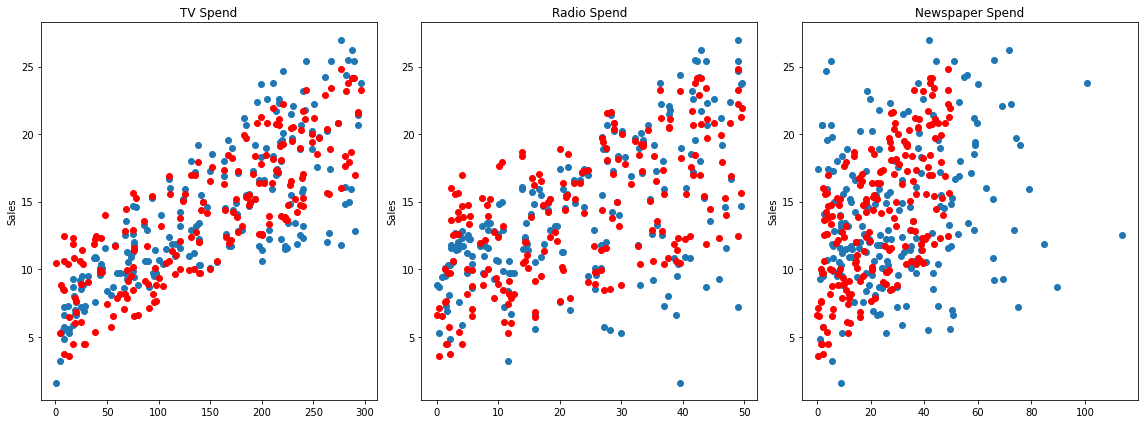

In [40]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

-----

## Model Persistence (Saving and Loading a Model)

In [41]:
from joblib import dump,load 

In [43]:
dump(final_model,'gdrive/My Drive/colab_files/final_sales_model.joblib')

['gdrive/My Drive/colab_files/final_sales_model.joblib']

In [46]:
loaded_model = load('gdrive/My Drive/colab_files/final_sales_model.joblib')

In [54]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

### Prediction on New Data

In [49]:
X.shape

(200, 3)

In [52]:
#149 TV, 22 Radio, 12 Newspaper
#sales ?
campaign = [[149,22,12]]

In [53]:
loaded_model.predict(campaign)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([13.893032])